
# CS515 - Deep Learning - 2025
## Homework 1 - Basic FeedForward Network
100 pts

## Task:
Get hands-on experience with training a shallow neural network (1- or 2-hidden layers only) on a small but adjustable problem. You will also compare the Neural Network result with Sklearn LinearRegression Model.


## Software:

You may find the necessary function references here:

https://pytorch.org/docs/stable/torch.html

## Include the necessary libraries

In [14]:
#import pytorch
import torch
import torch.optim as optim
import torch.nn as nn

#for plotting the learning curve
import matplotlib.pyplot as plt

import random
import numpy as np


## Hyperparameters

In [3]:
max_epochs        = 200_000 # maximum number of epochs
hiddensize        = 50        # number of hidden layers for your network
lr                = 1e-3        # learning rate
momentum          = 0.9        # momentum parameter for SGD optimizer
num_hidden_layers = 1        # number of hidden layers

## Set a random seed for reproducibility

In [15]:
seed = 42
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)

## 1. Generate and plot the data

tensor([[37.4540],
        [95.0714],
        [73.1994],
        [59.8658],
        [15.6019]])
tensor([[10251.4736],
        [10483.7715],
        [10382.1602],
        [10389.1846],
        [10138.6523]])


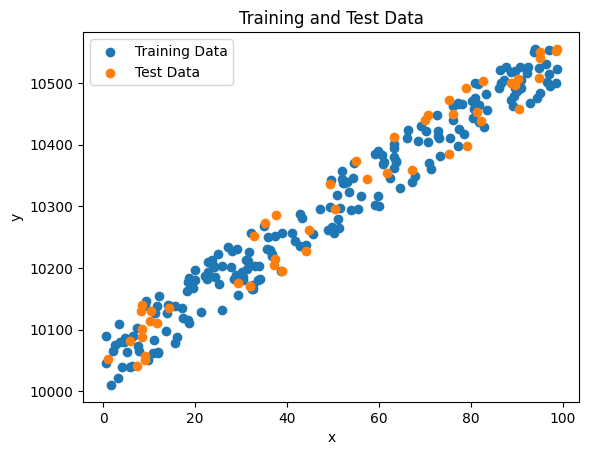

In [16]:
def return_data(num_samples):
    '''
    Function generates num_samples many instances of (x, 5 * x + 10000 + U(0,100)) pairs
    U(a,100) stands for uniform distribution
    '''
    x = torch.Tensor(np.random.rand(num_samples, 1) * 100)
    y = 5 * x + 10000 + torch.Tensor(np.random.rand(num_samples, 1) * 100)
    return x, y


# Set the number of instances
num_train = 200
num_test = 50

# Generate train and test data
x_train, y_train = return_data(num_train)
x_test, y_test = return_data(num_test)

# Show first 5 instances
print(x_train[:5])
print(y_train[:5])

# Plot the training data
plt.scatter(x_train.numpy(), y_train.numpy(), label='Training Data')

# Plot the test data
plt.scatter(x_test.numpy(), y_test.numpy(), label='Test Data')

plt.title("Training and Test Data")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()


## 2. Design a neural network

In [17]:
class Net(nn.Module):
    def __init__(self, hidden_dimension, num_hidden_layers):
        super(Net, self).__init__()

        # input layer: B x 1 -> B x hidden_dimension
        # we use Sequential so that we have: Linear -> ReLU
        self.input = nn.Sequential(
            nn.Linear(1, hidden_dimension),
            nn.ReLU()
        )

        # hidden layers: B x hidden_dimension -> B x hidden_dimension
        # repeated 'num_hidden_layers' times
        self.hiddens = nn.ModuleList()
        for _ in range(num_hidden_layers):
            self.hiddens.append(
                nn.Sequential(
                    nn.Linear(hidden_dimension, hidden_dimension),
                    nn.ReLU()
                )
            )

        # output layer: B x hidden_dimension -> B x 1
        self.output = nn.Linear(hidden_dimension, 1)

    def forward(self, x):
        # pass through input layer
        x = self.input(x)

        # pass through each hidden layer in sequence
        for hidden in self.hiddens:
            x = hidden(x)

        # pass through the output layer
        x = self.output(x)
        return x

## 3. Create a network, loss function and optimizer

In [9]:
# Create the neural network and specify the loss function and optimizer

# Example: hidden_dimension=50, num_hidden_layers=1
net = Net(hidden_dimension=hiddensize, num_hidden_layers=num_hidden_layers)

# Define the loss function (MSE for regression)
criterion = torch.nn.MSELoss()

# Define the optimizer
# Example 1: Using SGD without momentum
# optimizer = torch.optim.SGD(net.parameters(), lr=lr)

# Example 2: Using SGD with momentum
# optimizer = torch.optim.SGD(net.parameters(), lr=lr, momentum=momentum)

# Example 3: Using Adam
optimizer = torch.optim.Adam(net.parameters(), lr=lr)



## 4. Training loop

Epoch 10000: Loss = 1008.6090698242188

Validation loss: 1140.6767578125 

Epoch 20000: Loss = 853.585205078125

Validation loss: 1019.0493774414062 

Epoch 30000: Loss = 853.5816650390625

Validation loss: 1019.07421875 

Epoch 40000: Loss = 853.5889892578125

Validation loss: 1019.060791015625 

Epoch 50000: Loss = 853.58642578125

Validation loss: 1019.0580444335938 

Epoch 60000: Loss = 853.5830688476562

Validation loss: 1019.0684204101562 

Epoch 70000: Loss = 853.5882568359375

Validation loss: 1019.0596923828125 

Epoch 80000: Loss = 853.585205078125

Validation loss: 1019.0584106445312 

Epoch 90000: Loss = 853.5892333984375

Validation loss: 1019.0554809570312 

Epoch 100000: Loss = 953.6741943359375

Validation loss: 1038.2198486328125 

Epoch 110000: Loss = 853.5823364257812

Validation loss: 1019.0594482421875 

Epoch 120000: Loss = 853.1607055664062

Validation loss: 1008.280517578125 

Epoch 130000: Loss = 893.716064453125

Validation loss: 1036.40478515625 

Epoch 14000

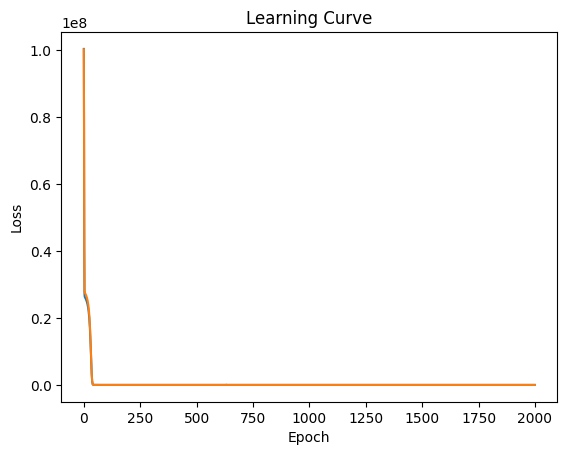

In [10]:
# Train the neural network

# Set the desired error threshold
# acceptable for the function
error_threshold = 0.001

# To display the learning curve
losses = []
vallosses = []

epoch = 0

while epoch < max_epochs:
    epoch += 1

    # Zero the gradients
    optimizer.zero_grad()

    # Forward pass
    y_pred = net(x_train)

    # Compute the loss
    loss = criterion(y_pred, y_train)

    # Backward pass
    loss.backward()

    # Update the weights
    optimizer.step()


    # Make an evaluation on the test set every 100 epochs
    if epoch % 100 == 0:

        losses.append(loss.item())

        # Test the neural network with val data
        with torch.no_grad():
          y_pred = net(x_test)

        valloss = criterion(y_pred, y_test) # loss in the test set
        vallosses.append(valloss.item())

        # Print the loss every 1000 epochs
        if epoch % 10000 == 0:
            print("Epoch {}: Loss = {}".format(epoch, loss.item()))
            print('\nValidation loss:', valloss.item(), '\n')

        # Check if the error is below the threshold
        if loss < error_threshold or epoch > 200000:
            break


#end of the epoch loop ------------------------------------------------

# Plot the learning curve
plt.plot(losses)
plt.plot(vallosses)
plt.title("Learning Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()



## 5. Test the final model on train and test sets

MSE on Training Set = 832.0592
MSE on Test Set = 1053.9696


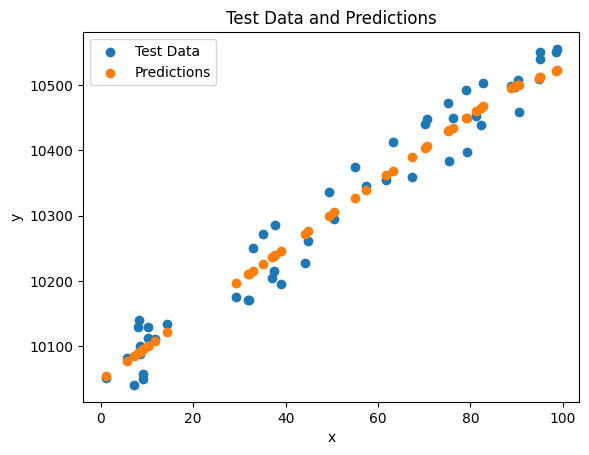

In [11]:
# Test the neural network with training data ---------------------
with torch.no_grad():
    # Make a forward pass on the train data
    y_pred = net(x_train)  # net is your trained model

# Calculate the training loss
loss = criterion(y_pred, y_train)  # MSE between predictions and true labels
print("MSE on Training Set = {:.4f}".format(loss.item()))

# Now let's see the generalization error --------------------------
# Test the neural network with test data
with torch.no_grad():
    y_pred_test = net(x_test)  # forward pass on the test data

# Calculate the test loss
valloss = criterion(y_pred_test, y_test)
print("MSE on Test Set = {:.4f}".format(valloss.item()))

# Plot the test data & predictions --------------------------------
plt.scatter(x_test.numpy(), y_test.numpy(), label='Test Data')
plt.scatter(x_test.numpy(), y_pred_test.numpy(), label='Predictions')

plt.title("Test Data and Predictions")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()


MULTI-RUN CODE


====== RUNNING EXPERIMENT ======
 hidden_dimension=25, num_hidden_layers=1, optimizer=SGD, lr=0.001, momentum=0.0

  Epoch 10000, Train Loss=32773773312.0000, Test Loss=32638025728.0000
  Epoch 20000, Train Loss=22254.6582, Test Loss=27096.7305
  Epoch 30000, Train Loss=22254.6582, Test Loss=27096.7305
  Epoch 40000, Train Loss=22254.6582, Test Loss=27096.7305
  Epoch 50000, Train Loss=22254.6582, Test Loss=27096.7305
  Epoch 60000, Train Loss=22254.6582, Test Loss=27096.7305
  Epoch 70000, Train Loss=22254.6582, Test Loss=27096.7305
  Epoch 80000, Train Loss=22254.6582, Test Loss=27096.7305
  Epoch 90000, Train Loss=22254.6582, Test Loss=27096.7305
  Epoch 100000, Train Loss=22254.6582, Test Loss=27096.7305
  Epoch 110000, Train Loss=22254.6582, Test Loss=27096.7305
  Epoch 120000, Train Loss=22254.6582, Test Loss=27096.7305
  Epoch 130000, Train Loss=22254.6582, Test Loss=27096.7305
  Epoch 140000, Train Loss=22254.6582, Test Loss=27096.7305
  Epoch 150000, Train Loss=22254.6582, Te

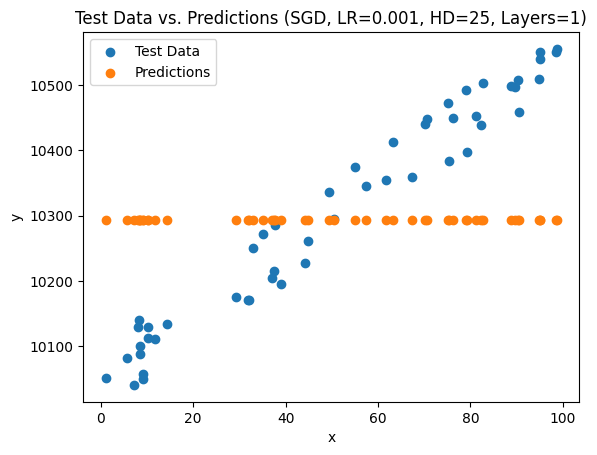


====== RUNNING EXPERIMENT ======
 hidden_dimension=50, num_hidden_layers=2, optimizer=SGD, lr=0.0001, momentum=0.0

NaN encountered in training loss, stopping early for this config.


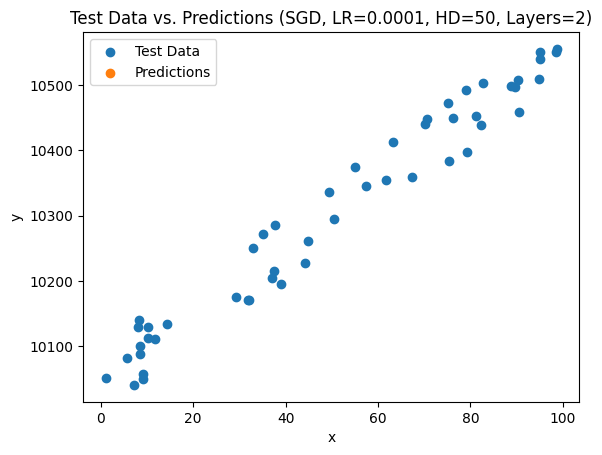


====== RUNNING EXPERIMENT ======
 hidden_dimension=25, num_hidden_layers=1, optimizer=SGD, lr=0.001, momentum=0.9

NaN encountered in training loss, stopping early for this config.


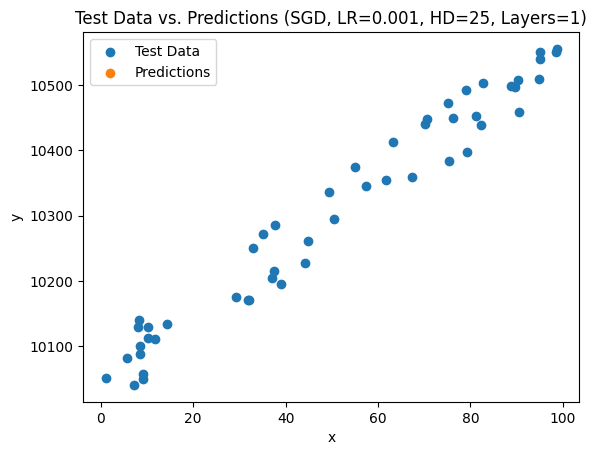


====== RUNNING EXPERIMENT ======
 hidden_dimension=50, num_hidden_layers=2, optimizer=SGD, lr=0.0001, momentum=0.9

NaN encountered in training loss, stopping early for this config.


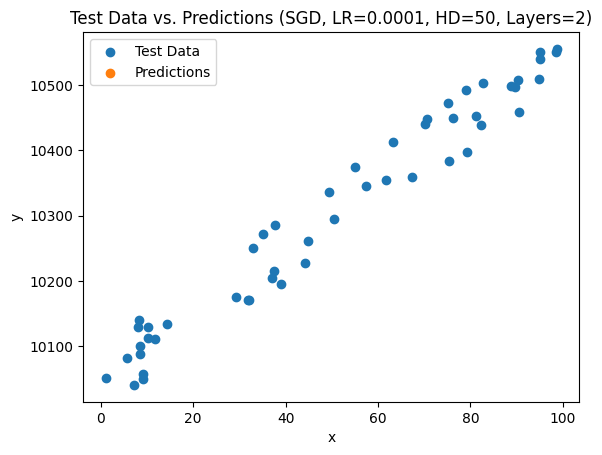


====== RUNNING EXPERIMENT ======
 hidden_dimension=25, num_hidden_layers=1, optimizer=Adam, lr=0.001, momentum=0.0

  Epoch 10000, Train Loss=1021.3967, Test Loss=1222.4142
  Epoch 20000, Train Loss=837.5001, Test Loss=1095.5767
  Epoch 30000, Train Loss=835.2938, Test Loss=1111.8059
  Epoch 40000, Train Loss=833.2578, Test Loss=1139.7681
  Epoch 50000, Train Loss=831.3724, Test Loss=1160.3035
  Epoch 60000, Train Loss=860.8674, Test Loss=1299.4958
  Epoch 70000, Train Loss=828.2498, Test Loss=1165.6533
  Epoch 80000, Train Loss=827.3100, Test Loss=1168.2255
  Epoch 90000, Train Loss=826.6832, Test Loss=1171.3009
  Epoch 100000, Train Loss=826.3445, Test Loss=1176.8264
  Epoch 110000, Train Loss=826.2587, Test Loss=1177.7883
  Epoch 120000, Train Loss=826.2283, Test Loss=1180.4166
  Epoch 130000, Train Loss=826.2296, Test Loss=1180.0153
  Epoch 140000, Train Loss=826.2285, Test Loss=1180.1941
  Epoch 150000, Train Loss=913.0422, Test Loss=1205.3950
  Epoch 160000, Train Loss=826.2260,

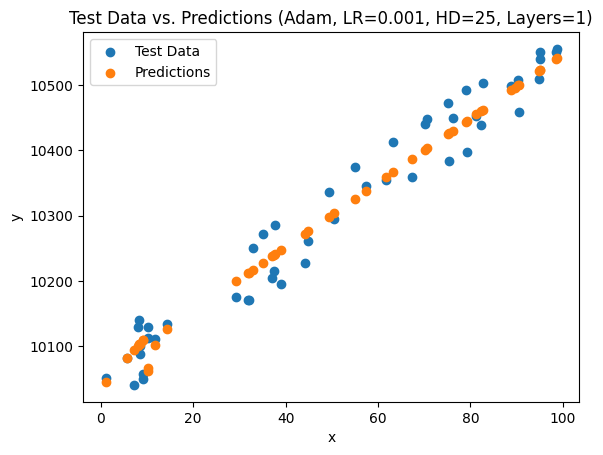


====== RUNNING EXPERIMENT ======
 hidden_dimension=50, num_hidden_layers=2, optimizer=Adam, lr=0.0001, momentum=0.0

  Epoch 10000, Train Loss=7783.6436, Test Loss=7852.0225
  Epoch 20000, Train Loss=913.4119, Test Loss=1029.7339
  Epoch 30000, Train Loss=854.7470, Test Loss=1019.1816
  Epoch 40000, Train Loss=853.5867, Test Loss=1019.0609
  Epoch 50000, Train Loss=853.5858, Test Loss=1019.0605
  Epoch 60000, Train Loss=853.5884, Test Loss=1019.0538
  Epoch 70000, Train Loss=853.5815, Test Loss=1019.0486
  Epoch 80000, Train Loss=853.5798, Test Loss=1019.0647
  Epoch 90000, Train Loss=853.5870, Test Loss=1019.0565
  Epoch 100000, Train Loss=853.5859, Test Loss=1019.0580
  Epoch 110000, Train Loss=853.5823, Test Loss=1019.0634
  Epoch 120000, Train Loss=853.5917, Test Loss=1019.0549
  Epoch 130000, Train Loss=853.5891, Test Loss=1019.0614
  Epoch 140000, Train Loss=853.5851, Test Loss=1019.0497
  Epoch 150000, Train Loss=853.5856, Test Loss=1019.0540
  Epoch 160000, Train Loss=853.5891

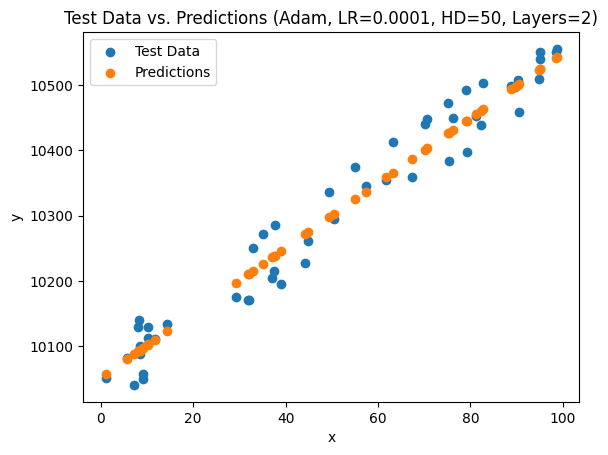



========== SUMMARY OF ALL EXPERIMENTS ==========
HiddenDim=25, Layers=1, Opt=SGD, LR=0.001, Mom=0.0 => FinalEpoch=200000, TrainMSE=22254.6582, TestMSE=27096.7305
HiddenDim=50, Layers=2, Opt=SGD, LR=0.0001, Mom=0.0 => FinalEpoch=5, TrainMSE=nan, TestMSE=nan
HiddenDim=25, Layers=1, Opt=SGD, LR=0.001, Mom=0.9 => FinalEpoch=5, TrainMSE=nan, TestMSE=nan
HiddenDim=50, Layers=2, Opt=SGD, LR=0.0001, Mom=0.9 => FinalEpoch=5, TrainMSE=nan, TestMSE=nan
HiddenDim=25, Layers=1, Opt=Adam, LR=0.001, Mom=0.0 => FinalEpoch=200000, TrainMSE=826.2287, TestMSE=1179.5642
HiddenDim=50, Layers=2, Opt=Adam, LR=0.0001, Mom=0.0 => FinalEpoch=200000, TrainMSE=853.5884, TestMSE=1019.0572


In [21]:
hidden_sizes = [25, 50, 100]
num_layers_list = [1, 2]
optimizers = [
    ('SGD', 0.0),   # SGD without momentum
    ('SGD', 0.9),   # SGD with momentum=0.9
    ('Adam', 0.0)   # Adam (momentum parameter is irrelevant here, so we set 0.0)
]
learning_rates = [1e-2, 1e-3, 1e-4, 1e-5]

param_combinations = []

param_combinations = [
    (25, 1, 'SGD',   1e-3,  0.0),
    (50, 2, 'SGD',   1e-4,  0.0),
    (25, 1, 'SGD',   1e-3,  0.9),
    (50, 2, 'SGD',   1e-4,  0.9),
    (25, 1, 'Adam',  1e-3,  0.0),
    (50, 2, 'Adam',  1e-4,  0.0),
]
# A place to store results:
results = []

for (hsize, n_layers, opt_name, lr_val, mom_val) in param_combinations:
    print(f"\n====== RUNNING EXPERIMENT ======")
    print(f" hidden_dimension={hsize}, num_hidden_layers={n_layers}, "
          f"optimizer={opt_name}, lr={lr_val}, momentum={mom_val}\n")

    # 1) Create the network
    net = Net(hidden_dimension=hsize, num_hidden_layers=n_layers)
    criterion = nn.MSELoss()

    # 2) Define the optimizer based on opt_name
    if opt_name == 'SGD':
        optimizer = optim.SGD(net.parameters(), lr=lr_val, momentum=mom_val)
    elif opt_name == 'Adam':
        optimizer = optim.Adam(net.parameters(), lr=lr_val)
    else:
        raise ValueError("Unknown optimizer name. Use 'SGD' or 'Adam'.")

    # 3) Training Loop
    error_threshold = 0.001
    max_epochs = 200_000  # or smaller if you want faster runs
    losses = []
    testlosses = []   # renamed from 'vallosses' for clarity
    epoch = 0

    while epoch < max_epochs:
        epoch += 1
        optimizer.zero_grad()
        y_pred = net(x_train)
        loss = criterion(y_pred, y_train)

        # If loss is NaN, break to avoid infinite loop
        if torch.isnan(loss):
            print("NaN encountered in training loss, stopping early for this config.")
            break

        loss.backward()
        optimizer.step()

        # Evaluate every 100 epochs
        if epoch % 100 == 0:
            losses.append(loss.item())
            with torch.no_grad():
                y_pred_test = net(x_test)
                test_loss = criterion(y_pred_test, y_test)

            # If test loss is NaN, break as well
            if torch.isnan(test_loss):
                print("NaN encountered in test loss, stopping early for this config.")
                break

            testlosses.append(test_loss.item())

            # Print partial progress every 10k epochs
            if epoch % 10000 == 0:
                print(f"  Epoch {epoch}, Train Loss={loss.item():.4f}, Test Loss={test_loss.item():.4f}")

            # Early stop if below threshold
            if loss.item() < error_threshold:
                print(f"Stopping early (Train Loss < {error_threshold}).")
                break

    # 4) Final evaluation on training and test sets
    with torch.no_grad():
        train_pred = net(x_train)
    final_train_loss = criterion(train_pred, y_train).item()

    with torch.no_grad():
        test_pred = net(x_test)
    final_test_loss = criterion(test_pred, y_test).item()

    # 5) Store results
    experiment_result = {
        'hidden_dimension': hsize,
        'num_hidden_layers': n_layers,
        'optimizer': opt_name,
        'lr': lr_val,
        'momentum': mom_val,
        'final_epoch': epoch,
        'train_mse': final_train_loss,
        'test_mse': final_test_loss
    }
    results.append(experiment_result)

    # (Optional) Plot the final predictions for each experiment
    plt.figure()
    plt.scatter(x_test.numpy(), y_test.numpy(), label='Test Data')
    plt.scatter(x_test.numpy(), test_pred.numpy(), label='Predictions')
    plt.title(f"Test Data vs. Predictions ({opt_name}, LR={lr_val}, HD={hsize}, Layers={n_layers})")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.show()

# Finally, after all runs, print a summary of results
print("\n\n========== SUMMARY OF ALL EXPERIMENTS ==========")
for r in results:
    print(
        f"HiddenDim={r['hidden_dimension']}, Layers={r['num_hidden_layers']}, "
        f"Opt={r['optimizer']}, LR={r['lr']}, Mom={r['momentum']} => "
        f"FinalEpoch={r['final_epoch']}, TrainMSE={r['train_mse']:.4f}, TestMSE={r['test_mse']:.4f}"
    )




Multi Run Results for Hidden Dimention 25

In [20]:
print("\n\n========== SUMMARY OF ALL EXPERIMENTS ==========")
for r in results:
    print(
        f"HiddenDim={r['hidden_dimension']}, Layers={r['num_hidden_layers']}, "
        f"Opt={r['optimizer']}, LR={r['lr']}, Mom={r['momentum']} => "
        f"FinalEpoch={r['final_epoch']}, TrainMSE={r['train_mse']:.4f}, TestMSE={r['test_mse']:.4f}"
    )





========== SUMMARY OF ALL EXPERIMENTS ==========
HiddenDim=25, Layers=1, Opt=SGD, LR=0.01, Mom=0.0 => FinalEpoch=5, TrainMSE=nan, TestMSE=nan
HiddenDim=25, Layers=1, Opt=SGD, LR=0.001, Mom=0.0 => FinalEpoch=5, TrainMSE=nan, TestMSE=nan
HiddenDim=25, Layers=1, Opt=SGD, LR=0.0001, Mom=0.0 => FinalEpoch=6, TrainMSE=nan, TestMSE=nan
HiddenDim=25, Layers=1, Opt=SGD, LR=1e-05, Mom=0.0 => FinalEpoch=200000, TrainMSE=184162800.0000, TestMSE=184526768.0000
HiddenDim=25, Layers=1, Opt=SGD, LR=0.01, Mom=0.9 => FinalEpoch=4, TrainMSE=nan, TestMSE=nan
HiddenDim=25, Layers=1, Opt=SGD, LR=0.001, Mom=0.9 => FinalEpoch=200000, TrainMSE=22254.5977, TestMSE=27102.7168
HiddenDim=25, Layers=1, Opt=SGD, LR=0.0001, Mom=0.9 => FinalEpoch=200000, TrainMSE=22254.6504, TestMSE=27109.3926
HiddenDim=25, Layers=1, Opt=SGD, LR=1e-05, Mom=0.9 => FinalEpoch=200000, TrainMSE=22260.5098, TestMSE=27173.4004
HiddenDim=25, Layers=1, Opt=Adam, LR=0.01, Mom=0.0 => FinalEpoch=200000, TrainMSE=1178.0291, TestMSE=1229.7902
Hi

## 6. Use Scikit-Learn for a solution
This is the simplest approach with a line of library function call - search for it (``scikit regression`` etc)


In [12]:
from sklearn.linear_model import LinearRegression

# Assuming x_train and y_train are NumPy arrays of shape (num_samples, 1)
# or PyTorch tensors converted to NumPy, e.g., x_train.numpy()

reg = LinearRegression().fit(x_train, y_train)

# Once fitted, you can look at the slope (coef_) and intercept:
print("Learned slope(s):", reg.coef_)
print("Learned intercept:", reg.intercept_)

Learned slope(s): [[4.973285]]
Learned intercept: [10051.73]


# **Report**

1) Try to find a good network with the given parameter ranges.

2) Include a table with your configuration (network architecture as 1-25-25-1 etc), learning rate, along with train and test losses at 200,000 epochs. Make the best results bold.

3) Include a single figure that shows the train and test loss with respect to the number of epochs for the best arconfiguration in the table.

4) You may state any other findings or comments at the end.

